Shoulder coordinates: (593.3013868331909, 387.01564449071884,-723.6452889442444)
Elbow coordinates: (643.4028220176697, 659.479907989502,-591.7540717124939)
Wrist coordinates: (653.8354229927063, 907.8635753393173,-809.1977167129517)


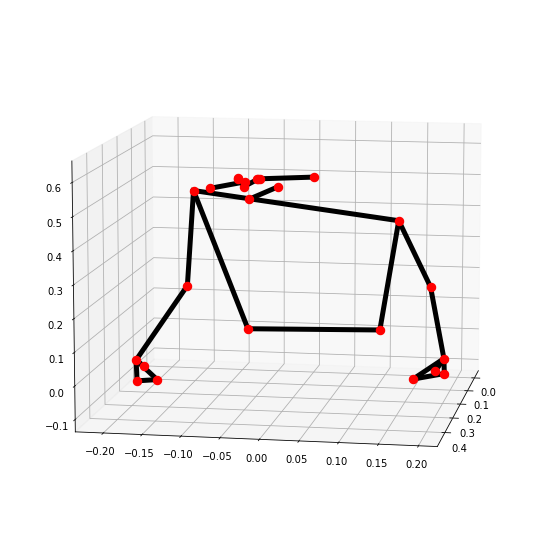

Shoulder coordinates: (292.2295153141022, 157.55270719528198,-151.155124604702)
Elbow coordinates: (290.5237376689911, 264.43530321121216,-205.8599442243576)
Wrist coordinates: (204.80187982320786, 243.21182370185852,-366.1623001098633)


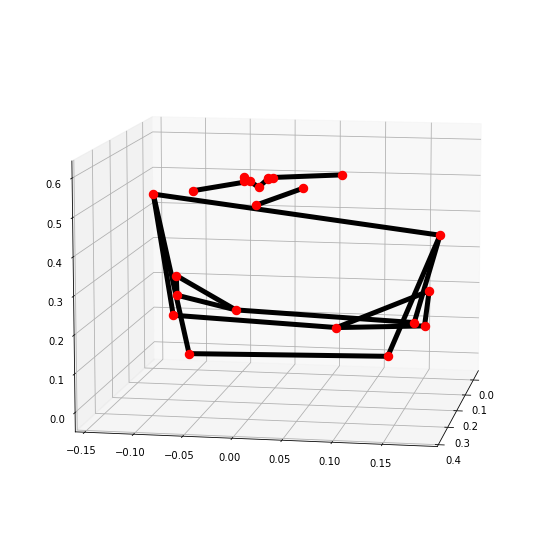

In [11]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# For static images:
IMAGE_FILES = ['test.png','test2.png']
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Shoulder coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_height},'
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].z * image_width})'
    )
        
    print(
        f'Elbow coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_height},'
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].z * image_width})'
    )
        
        
    print(
        f'Wrist coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_height},'
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].z * image_width})'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)


In [10]:
#links for z-ccordinate:
#https://developers.google.com/ml-kit/vision/pose-detection#z_coordinate
#https://google.github.io/mediapipe/solutions/pose#pose_world_landmarks (the magnitude of z uses roughly the same scale as x)
#similar application: https://blog.tensorflow.org/2021/08/3d-pose-detection-with-mediapipe-blazepose-ghum-tfjs.html